# IML Assignment 1

## Task 1

### Linear Regression
#### Data reading & plotting

In [155]:
import pandas as pd

data_path = 'task1_data.csv'
data = pd.read_csv(data_path)

In [156]:
X_train, y_train, X_test, y_test = data['X_train'], data['y_train'], data['X_test'], data['y_test']

<Figure size 1400x500 with 0 Axes>

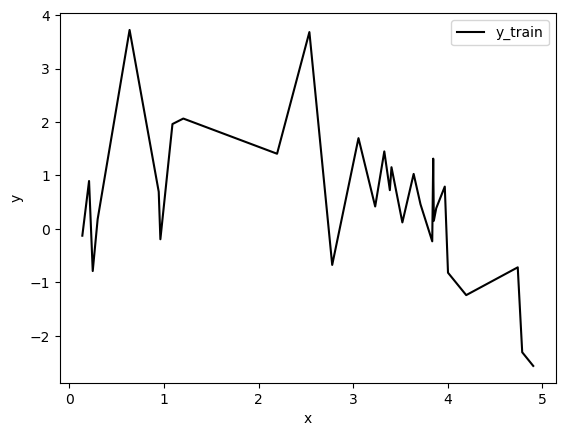

In [157]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

data.plot(x='X_train', y='y_train', color='black')

plt.xlabel("x")
plt.ylabel("y")

plt.legend(loc="best")
plt.show()

#### Linear regression model fitting

In [158]:
from sklearn.linear_model import LinearRegression
import numpy as np

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()

regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1), y_train)

LinearRegression()

#### Linear regression model prediction & Evaluation


In [159]:
from sklearn import metrics

def print_metrics(y_actual, y_pred):
    print("Mean absolute error: " + str(metrics.mean_absolute_error(y_actual, y_pred)))
    print("Mean squared error: " + str(metrics.mean_squared_error(y_actual, y_pred)))
    print("Root mean squared error: " + str((metrics.mean_squared_error(y_actual, y_pred))**(0.5)))
    print("Coefficient of determination: " + str(metrics.r2_score(y_actual, y_pred)))

In [160]:
from sklearn import metrics
import math

y_predict_linear = regressor.predict(X_test.reshape(-1,1))
print_metrics(y_test, y_predict_linear)

Mean absolute error: 0.783761030241441
Mean squared error: 0.78105677092199
Root mean squared error: 0.8837741628504365
Coefficient of determination: 0.2609450135378707


#### Plotting original data and prediction


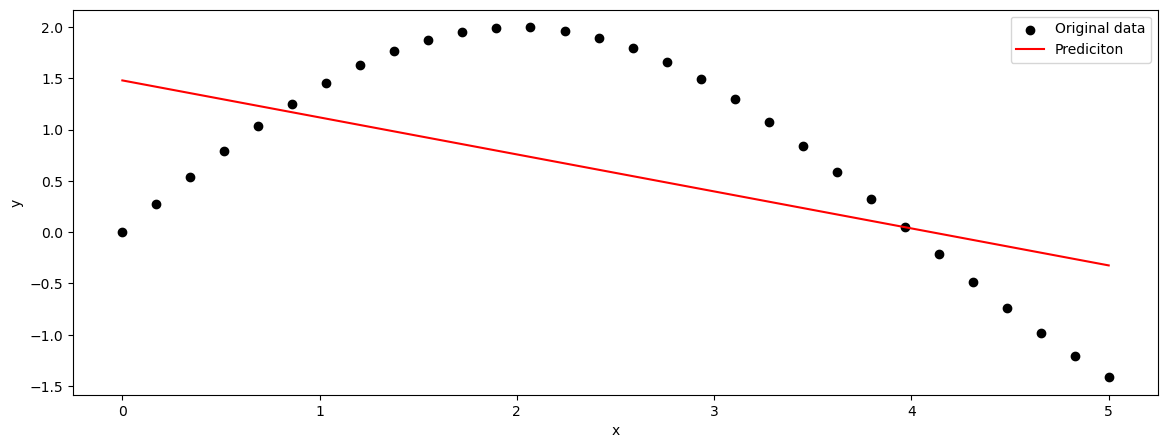

In [161]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

plt.scatter(X_test, y_test, color='black', label="Original data") 

plt.plot(X_test, y_predict_linear, color='red', label="Prediciton") 

plt.xlabel("x")
plt.ylabel("y")

plt.legend(loc="best")
plt.show()

#### Did the linear regression model give a good fit? Elaborate your answer

### Polynomial Regression
#### Constructing the polynomial regression pipeline

In [162]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [163]:
pipeline = Pipeline([("polynomial_features", PolynomialFeatures()), ("linear_regression", LinearRegression())])

#### Tuning the degree hyper-parameter using GridSearch

In [164]:
from sklearn.model_selection import GridSearchCV

degrees = range(2,10)
parameters = {'polynomial_features__degree': degrees}

search = GridSearchCV(pipeline, parameters, cv=8, scoring='neg_mean_squared_error')
search.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

print("Best parameter (CV score=%0.3f):" %search.best_score_, search.best_params_['polynomial_features__degree'])

y_predict_grid = search.predict(X_test.reshape(-1,1))

Best parameter (CV score=-1.078): 2


In [165]:
print_metrics(y_test, y_predict_grid)

Mean absolute error: 0.15213273421671727
Mean squared error: 0.08205877217937993
Root mean squared error: 0.2864590235607528
Coefficient of determination: 0.9223539862658873


#### Manually finding the best degree

#### Plotting the test data and the best degree polynomial model

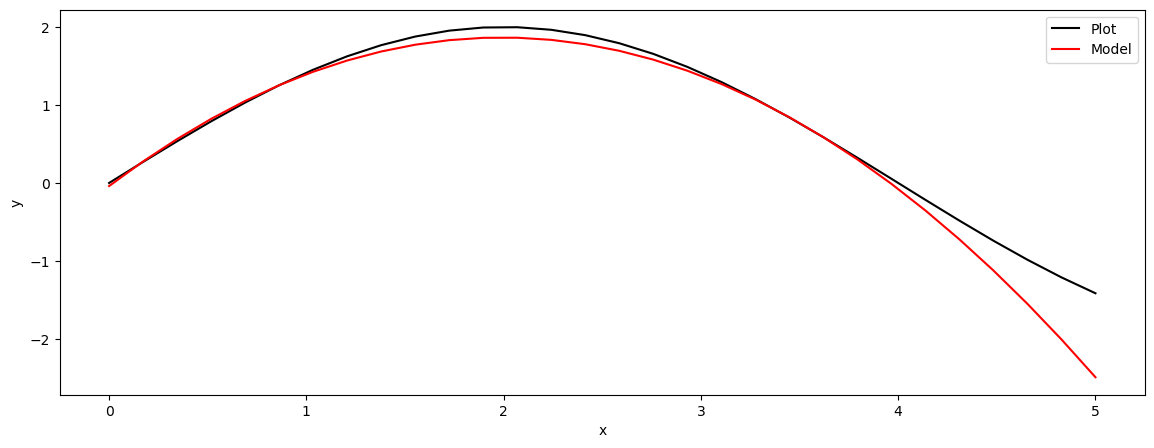

In [166]:
plt.figure(figsize=(14, 5))
plt.plot(X_test, y_test, color='black', label="Plot")

plt.plot(X_test, y_predict_grid, color='red', label="Model") 

plt.xlabel("x")
plt.ylabel("y")

plt.legend(loc="best")
plt.show()

## Task 2

### Data processing
#### Loading the dataset

In [167]:
import pandas as pd

data = pd.read_csv('pokemon_modified.csv')

#### Remove the 2 redundant features

In [168]:
X = data.drop(['is_legendary', 'name', 'classification'], axis = 1 )

y = data['is_legendary']

#### Splitting the data
random_state = 123, use stratify, test_size = 0.2

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify = y)

Check if the dataset is balanced or not and comment on it

In [170]:
print(y.value_counts())

0    731
1     70
Name: is_legendary, dtype: int64


#### Exploring the dataset and checking for missing values

In [171]:
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 574 to 219
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        161 non-null    float64
 1   against_dark       161 non-null    float64
 2   against_dragon     161 non-null    float64
 3   against_electric   161 non-null    float64
 4   against_fairy      161 non-null    float64
 5   against_fight      161 non-null    float64
 6   against_fire       161 non-null    float64
 7   against_flying     161 non-null    float64
 8   against_ghost      161 non-null    float64
 9   against_grass      161 non-null    float64
 10  against_ground     161 non-null    float64
 11  against_ice        161 non-null    float64
 12  against_normal     161 non-null    float64
 13  against_poison     161 non-null    float64
 14  against_psychic    161 non-null    float64
 15  against_rock       161 non-null    float64
 16  against_steel      161 n

In [172]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 564 to 693
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        640 non-null    float64
 1   against_dark       640 non-null    float64
 2   against_dragon     640 non-null    float64
 3   against_electric   640 non-null    float64
 4   against_fairy      640 non-null    float64
 5   against_fight      640 non-null    float64
 6   against_fire       640 non-null    float64
 7   against_flying     640 non-null    float64
 8   against_ghost      640 non-null    float64
 9   against_grass      640 non-null    float64
 10  against_ground     640 non-null    float64
 11  against_ice        640 non-null    float64
 12  against_normal     640 non-null    float64
 13  against_poison     640 non-null    float64
 14  against_psychic    640 non-null    float64
 15  against_rock       640 non-null    float64
 16  against_steel      640 n

#### Impute the missing values

In [173]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_train)
X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

#### Double check that there are no missing values

In [174]:
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   against_bug        161 non-null    object
 1   against_dark       161 non-null    object
 2   against_dragon     161 non-null    object
 3   against_electric   161 non-null    object
 4   against_fairy      161 non-null    object
 5   against_fight      161 non-null    object
 6   against_fire       161 non-null    object
 7   against_flying     161 non-null    object
 8   against_ghost      161 non-null    object
 9   against_grass      161 non-null    object
 10  against_ground     161 non-null    object
 11  against_ice        161 non-null    object
 12  against_normal     161 non-null    object
 13  against_poison     161 non-null    object
 14  against_psychic    161 non-null    object
 15  against_rock       161 non-null    object
 16  against_steel      161 non-null    object
 1

In [175]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   against_bug        640 non-null    object
 1   against_dark       640 non-null    object
 2   against_dragon     640 non-null    object
 3   against_electric   640 non-null    object
 4   against_fairy      640 non-null    object
 5   against_fight      640 non-null    object
 6   against_fire       640 non-null    object
 7   against_flying     640 non-null    object
 8   against_ghost      640 non-null    object
 9   against_grass      640 non-null    object
 10  against_ground     640 non-null    object
 11  against_ice        640 non-null    object
 12  against_normal     640 non-null    object
 13  against_poison     640 non-null    object
 14  against_psychic    640 non-null    object
 15  against_rock       640 non-null    object
 16  against_steel      640 non-null    object
 1

#### Encode categorically

In [176]:
print(X_train.head())

  against_bug against_dark against_dragon against_electric against_fairy  \
0         1.0          1.0            1.0              2.0           1.0   
1         1.0          2.0            1.0              1.0           0.5   
2         1.0          1.0            1.0              0.5           0.5   
3         1.0          1.0            1.0              1.0           1.0   
4         1.0          1.0            1.0              0.0           1.0   

  against_fight against_fire against_flying against_ghost against_grass  ...  \
0           2.0         0.25            0.5           1.0           4.0  ...   
1           0.5          0.5            1.0           2.0           0.5  ...   
2           0.5          2.0            2.0           1.0          0.25  ...   
3           2.0          1.0            1.0           0.0           1.0  ...   
4           1.0          1.0            1.0           1.0           2.0  ...   

  experience_growth height_m   hp percentage_male    type1 sp_

In [177]:
from sklearn.preprocessing import OneHotEncoder
def ohe_new_features(data, features_name, encoder):
    new_feats = encoder.transform(data[features_name])
    new_cols = pd.DataFrame(new_feats, columns=encoder.get_feature_names_out(features_name))
    new_data = pd.concat([data, new_cols], axis=1)    
    new_data.drop(features_name, axis=1, inplace=True)
    return new_data

encoder = OneHotEncoder(sparse=False, drop='first')
f_names = ['type1']
encoder.fit(X_train[f_names])
X_train = ohe_new_features(X_train, f_names, encoder)
X_test = ohe_new_features(X_test, f_names, encoder)

In [178]:
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        161 non-null    object 
 1   against_dark       161 non-null    object 
 2   against_dragon     161 non-null    object 
 3   against_electric   161 non-null    object 
 4   against_fairy      161 non-null    object 
 5   against_fight      161 non-null    object 
 6   against_fire       161 non-null    object 
 7   against_flying     161 non-null    object 
 8   against_ghost      161 non-null    object 
 9   against_grass      161 non-null    object 
 10  against_ground     161 non-null    object 
 11  against_ice        161 non-null    object 
 12  against_normal     161 non-null    object 
 13  against_poison     161 non-null    object 
 14  against_psychic    161 non-null    object 
 15  against_rock       161 non-null    object 
 16  against_steel      161 non

#### Scale the data

In [179]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)


X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,0.2,0.200000,0.5,0.500,0.200000,0.500,0.000000,0.066667,0.25,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.2,0.466667,0.5,0.250,0.066667,0.125,0.066667,0.200000,0.50,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.2,0.200000,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.200000,0.5,0.250,0.200000,0.500,0.200000,0.200000,0.00,0.200000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.200000,0.5,0.000,0.200000,0.250,0.200000,0.200000,0.25,0.466667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.2,0.200000,0.5,0.250,0.200000,0.500,0.066667,0.066667,0.25,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
636,0.2,0.200000,0.5,0.500,0.200000,0.250,0.066667,0.200000,0.25,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
637,0.2,0.200000,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.2,0.200000,0.5,0.000,0.200000,0.125,0.466667,0.466667,0.25,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Confusion Matrix

Are there highly co-related features in the dataset? Is it a problem?

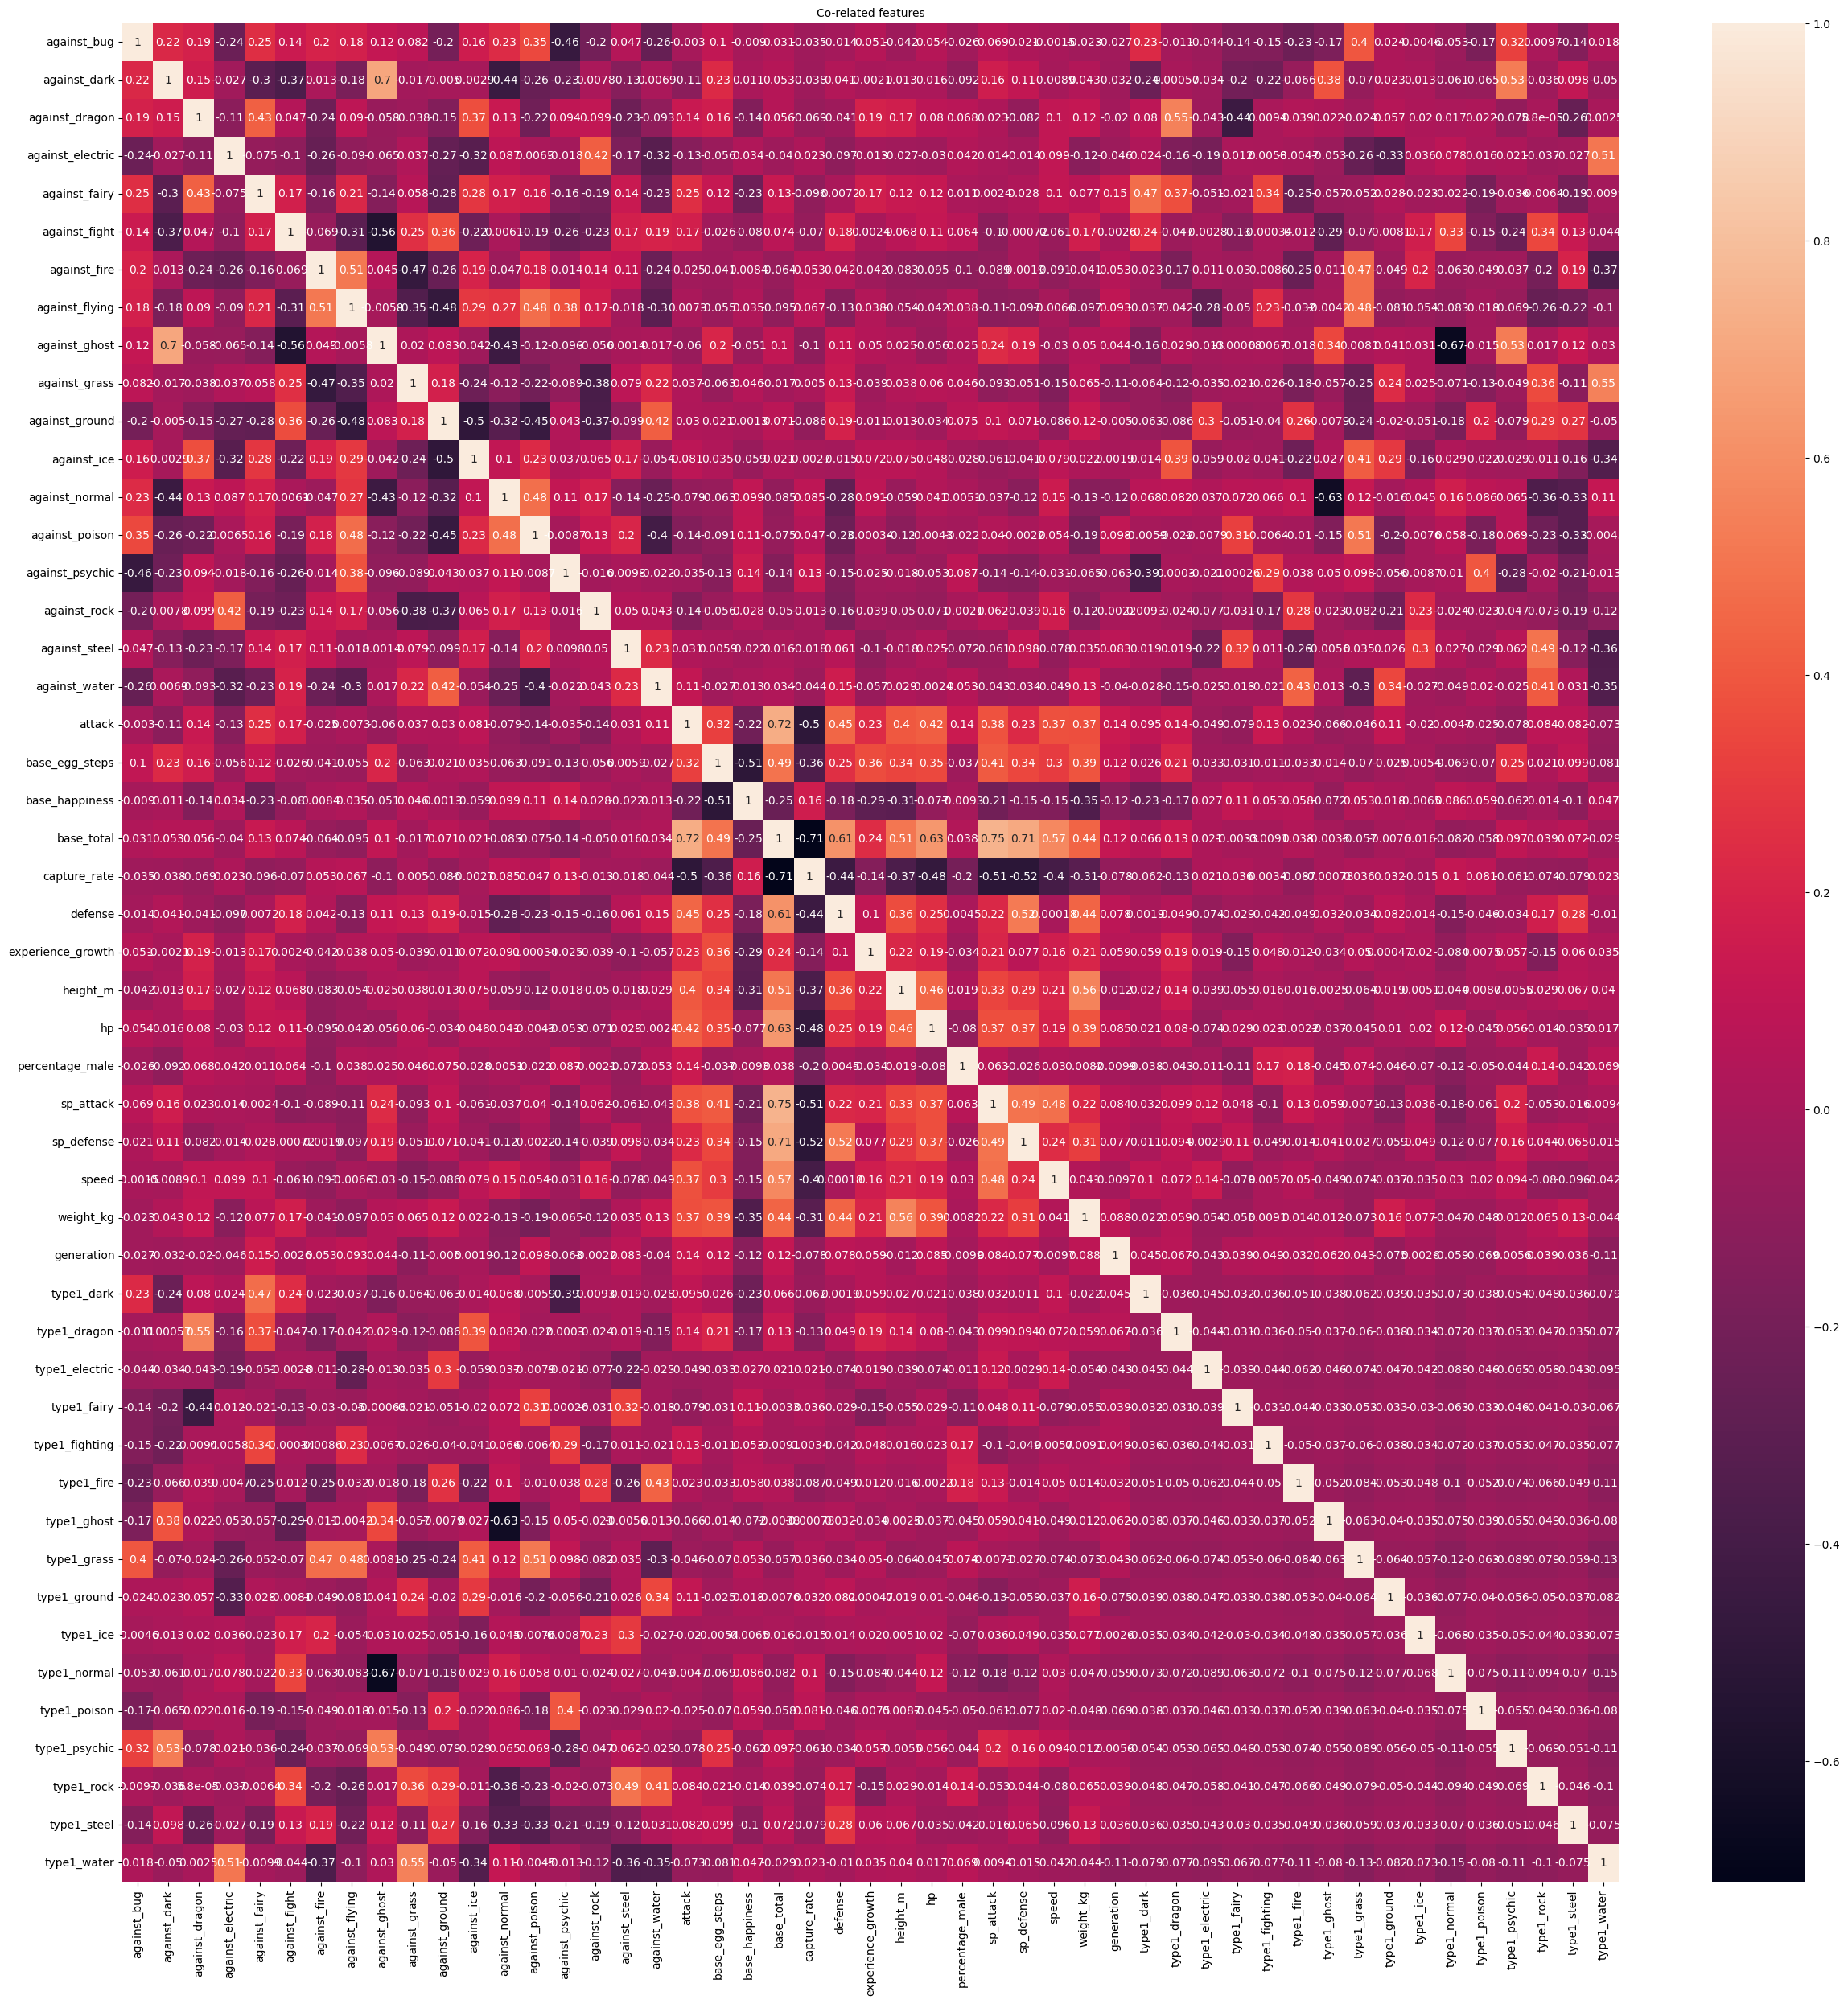

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))

sns.heatmap((X_train)[np.array(X_train.columns)].corr(),annot=True, fmt='.2g')
plt.title('Co-related features', fontsize=10)
plt.show()

### Model fitting and Comparison

#### Tuning LR model

In [181]:
# caclulate and print metrics
def print_clf_metrics( y_actual, y_pred ):
    print("Accuracy = " + str(metrics.accuracy_score(y_actual, y_pred)))
    print("Precision = " + str(metrics.precision_score(y_actual, y_pred)))
    print("Recall = " + str(metrics.recall_score(y_actual, y_pred)))
    print("F1-score = " + str(metrics.f1_score(y_actual, y_pred)))

In [182]:
parameters = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3, 3, 7),
    'solver': ['newton-cg', 'lbfgs', 'liblinear']  
}

max_iter=1000 in LR constructor

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

log_regression = LogisticRegression(max_iter=1000)

gs_clf = GridSearchCV(log_regression, parameters, cv = 8)

In [ ]:
gs_clf.fit(X_train, y_train)
y_predict = gs_clf.predict(X_test)

In [185]:
print("Tuned Hyperparameters :", gs_clf.best_params_)
print("Accuracy :", metrics.accuracy_score(y_test, y_predict))

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9937888198757764


#### Construct a LR with the best params and Evaluate the LR with the best params

In [186]:
lr_clf = LogisticRegression(max_iter=1000, C=10.0, penalty='l1', solver='liblinear')

In [187]:
lr_clf.fit(X_train, y_train)
y_predict = lr_clf.predict(X_test)

In [188]:
print_clf_metrics(y_test, y_predict)

Accuracy = 0.9937888198757764
Precision = 0.9333333333333333
Recall = 1.0
F1-score = 0.9655172413793104


#### Tuning KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': list(range(1, 15)),
    'weights':['uniform','distance'], 
    'metric':['euclidean', 'manhattan', 'chebyshev', 'cosine']
}

grid_search_clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 8)

grid_search_clf.fit(X_train, y_train)
y_predict = grid_search_clf.predict(X_test)

print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :", metrics.accuracy_score(y_test, y_predict))

#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1, metric='cosine', weights='uniform')
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print_clf_metrics(y_test, y_predict)

#### Fitting GNB to the data and evaluating on the test dataset

In [191]:
from sklearn.naive_bayes import GaussianNB

gauss_nb = GaussianNB()
gauss_nb.fit(X_train, y_train)
y_pred = gauss_nb.predict(X_test)

print_clf_metrics(y_test, y_pred)

Accuracy = 0.9316770186335404
Precision = 0.56
Recall = 1.0
F1-score = 0.717948717948718
